In [3]:
import numpy as np
import matplotlib.pyplot as plt
from src.environment import Tweezer, Pendulum
from src.utils.memory import Memory
from src.models import DDPG
from src.models.RBF import rbfprojector
from time import time
from tqdm import tqdm

In [18]:
def state_value_action_critic(env, 
                              sigma=1, 
                              gamma=0.99, 
                              alpha=0.2, 
                              beta=0.01, 
                              episodes=300, 
                              steps=2000, 
                              render_step=0, 
                              rate = 0.99,
                              plot=True
                             ):
    s = env.reset()
    feature = rbfprojector(21, 0.2)
    w = np.zeros(len(feature([0, 0, 0])))
    theta = np.random.rand(len(feature([0, 0, 0])))
    start = time()
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        rewards, actions, states = [], [], []
        for t in range(steps):
            # Compute phi_s and pi_s_theta
            phi_s = feature(s)
            pi_s_theta = np.dot(theta, phi_s)
            # Take an action and apply to the system
            a = np.random.normal(pi_s_theta, scale=sigma, size=None)
            states.append(s)
            sP, r, done, _ = env.step(a)
            actions.append(a)
            # Compute phi_sP
            phi_sP = feature(sP)
            # Compute delta and update w and theta
            delta = r + gamma*np.dot(w, phi_sP) - np.dot(w, phi_s)
            w = w + alpha*delta*phi_s
            theta = theta + beta*(a-pi_s_theta)*phi_s*delta
            total_r+=r
            s = sP
            if done:
                break
        print(total_r)
        actions = np.array(actions)
        states = np.array(states)
        rewards.append(total_r) 
        sigma = sigma*rate
    end = time()
    env.close()
#    return theta, w, np.array(rewards), end-start
    return states, actions

In [19]:
env = Tweezer()
env.max_voltage

100

In [20]:
states, actions  = state_value_action_critic(Pendulum())

  1%|          | 3/300 [00:00<00:12, 24.30it/s]

-985.9378589632304
-1481.4178535281603
-1303.9211249915538
-1526.1717555015703
-1502.5068976933967


  3%|▎         | 9/300 [00:00<00:11, 24.50it/s]

-1384.720053306825
-1000.1649403450324
-1052.3318857199542
-1116.0393648038291
-926.3203925513847


  5%|▌         | 15/300 [00:00<00:11, 24.59it/s]

-1516.0683962675948
-709.427023524584
-1289.650461526131
-1045.2641095326528
-1676.8477188562426


  6%|▌         | 18/300 [00:00<00:11, 24.47it/s]

-1429.907511496754
-1443.6932815689147
-1238.1650171898445
-1059.5223982703012
-951.5708364379091


  8%|▊         | 24/300 [00:00<00:11, 24.26it/s]

-1523.5253587911066
-1440.6304105576444
-752.7889664107669
-1495.4752963081105
-1024.1044862366211


 10%|█         | 30/300 [00:01<00:11, 24.27it/s]

-1326.3418199011226
-1207.556178610424
-1498.67254923089
-901.3746336658487
-1532.7297174592613


 11%|█         | 33/300 [00:01<00:11, 23.97it/s]

-1389.692532102562
-1076.798817730523
-1351.521057427747
-1628.1167349310836
-1468.7591870481579


 13%|█▎        | 39/300 [00:01<00:11, 23.56it/s]

-1491.219108217694
-1533.887358626234
-731.97655291118
-1103.5319309083768
-1129.2008571368222


 15%|█▌        | 45/300 [00:01<00:10, 23.58it/s]

-1434.2347990932603
-895.0754092144882
-1172.3087948507068
-713.7061914146699
-972.1195799507168


 16%|█▌        | 48/300 [00:02<00:10, 23.45it/s]

-1413.9366968339248
-954.737869760857
-1384.5463422023101
-1504.0588149220946
-992.623374962847


 18%|█▊        | 54/300 [00:02<00:10, 23.67it/s]

-1402.2755611390655
-1465.5212675593034
-1044.4456120152452
-1564.2500550070201
-1469.85621957468


 20%|██        | 60/300 [00:02<00:10, 23.76it/s]

-1407.2500391525348
-1193.1916480521852
-1067.43535089083
-1504.9427138249634
-1494.3394597282213


 21%|██        | 63/300 [00:02<00:09, 23.74it/s]

-958.3010557736023
-966.3250036115996
-1283.356700365268
-1516.48283714311
-1257.716725733024


 23%|██▎       | 69/300 [00:02<00:09, 23.84it/s]

-938.3966547577936
-1121.7391830937363
-1318.6111482974068
-1522.413475285145
-968.861752429207


 25%|██▌       | 75/300 [00:03<00:09, 23.41it/s]

-1491.861133537882
-1351.9399852656047
-859.9214631477774
-861.5516473639552
-1103.6977152609861


 26%|██▌       | 78/300 [00:03<00:09, 23.32it/s]

-1070.0020323728427
-966.8680714631394
-1494.0852032516088
-1508.138394895236
-1209.8021736811265


 28%|██▊       | 84/300 [00:03<00:09, 23.30it/s]

-886.1062283849457
-1348.6545196969857
-769.139263055447
-1509.8002197841586
-1492.5210965919957


 30%|███       | 90/300 [00:03<00:08, 23.66it/s]

-1108.625032729913
-1496.9202114892114
-1492.1503799461775
-793.6962615848528
-1155.130734898561


 31%|███       | 93/300 [00:03<00:08, 23.68it/s]

-1409.3257822794287
-1356.8376331010231
-872.345732047521
-1298.9672896689276
-1495.3249626320867


 33%|███▎      | 99/300 [00:04<00:08, 23.43it/s]

-1189.3647909519898
-1496.4516492265461
-931.5626980158855
-1097.130059414804
-952.4315786845605


 35%|███▌      | 105/300 [00:04<00:08, 23.35it/s]

-1378.4578611013224
-1251.3618409864077
-1492.7935342268495
-1308.2650852283875
-889.281448289437


 36%|███▌      | 108/300 [00:04<00:08, 23.03it/s]

-1207.5523906391797
-1243.4327566464488
-1456.824236789652
-1121.9581011099467
-1087.0954626809068


 38%|███▊      | 114/300 [00:04<00:08, 23.24it/s]

-802.9189230140759
-961.4327725763981
-1486.1634185888784
-968.8144433972343
-1059.0048360738633


 40%|████      | 120/300 [00:05<00:07, 23.42it/s]

-1359.8253448645341
-945.0373791257725
-1492.1578654645095
-1513.506830132187
-1389.5267918265954


 41%|████      | 123/300 [00:05<00:07, 23.28it/s]

-838.4170553805884
-1495.914981749753
-1493.6713519635575
-1492.1164460585778
-1472.0350589805767


 43%|████▎     | 129/300 [00:05<00:07, 23.37it/s]

-938.103698893087
-1283.049145111399
-1369.0741096962913
-845.2787266750152
-1519.4003630497282


 45%|████▌     | 135/300 [00:05<00:07, 23.50it/s]

-1389.888991020854
-934.7458436777225
-1242.7963067776534
-1502.8471323651738
-1431.9827947775964


 46%|████▌     | 138/300 [00:05<00:06, 23.46it/s]

-1212.3426078511093
-1071.5329631613452
-741.7566550200377
-1232.6627501939645
-1503.0005164199547


 48%|████▊     | 144/300 [00:06<00:06, 23.72it/s]

-1519.7758142633763
-1492.1860023193285
-1476.265458297632
-1214.321187531305
-1006.9932315949566


 50%|█████     | 150/300 [00:06<00:06, 23.60it/s]

-760.6697042976517
-1498.8902890476315
-1339.2692104076982
-1240.302934863277
-1495.733850007898


 51%|█████     | 153/300 [00:06<00:06, 23.76it/s]

-1073.014535810786
-813.2002847377648
-1210.8999009400495
-1497.9000388437557
-739.9963814794608


 53%|█████▎    | 159/300 [00:06<00:05, 23.52it/s]

-1053.3454008195815
-1087.2606866450656
-1183.9946931629395
-651.9342443525501
-640.2665928143875


 55%|█████▌    | 165/300 [00:06<00:05, 23.94it/s]

-903.0474542801626
-898.8543816231357
-761.2017497310483
-1030.1379371059238
-1486.9583761618126


 56%|█████▌    | 168/300 [00:07<00:05, 23.98it/s]

-931.0561179793824
-1417.5508928161455
-1522.1768750259212
-1251.8863732446723
-1219.2938087328691


 58%|█████▊    | 174/300 [00:07<00:05, 23.71it/s]

-1185.4419579538971
-1198.2901806698114
-1576.120956029448
-1148.7564390692473
-1196.0264531795647


 60%|██████    | 180/300 [00:07<00:05, 23.91it/s]

-1543.0621488280399
-1496.9531270826571
-791.8756900271339
-1504.6447835126185
-1551.0389534685637


 61%|██████    | 183/300 [00:07<00:04, 24.00it/s]

-875.0509394497363
-1305.7450355476362
-1498.2551754315941
-1335.563727876052
-1493.5478710857712


 63%|██████▎   | 189/300 [00:07<00:04, 23.91it/s]

-1024.0865821253017
-870.0798556754205
-1150.1994718890783
-1218.4931390187603
-774.936994092195


 65%|██████▌   | 195/300 [00:08<00:04, 23.92it/s]

-839.8231475466462
-1494.1108952040654
-877.7636921061603
-776.5616348669873
-1493.3975190045824


 66%|██████▌   | 198/300 [00:08<00:04, 23.77it/s]

-1529.0718186601025
-894.252704354762
-896.8776569172109
-833.6664288355609
-1080.4564574989342


 68%|██████▊   | 204/300 [00:08<00:04, 23.88it/s]

-1199.5865060979274
-807.5999949880891
-1100.917809167413
-1173.8725691470022
-883.4330114478714


 70%|███████   | 210/300 [00:08<00:03, 23.88it/s]

-895.5150018499692
-727.0641796338552
-1507.3350408593153
-1519.8071986237962
-1409.8820786836586


 71%|███████   | 213/300 [00:08<00:03, 23.86it/s]

-1177.464133131959
-1112.4755921051585
-1498.2408989914766
-789.1108345277407
-1493.351205629864


 73%|███████▎  | 219/300 [00:09<00:03, 23.85it/s]

-1459.1607012154846
-1148.913568632482
-778.7232521656432
-890.0746155373221
-665.9241046967052


 75%|███████▌  | 225/300 [00:09<00:03, 23.31it/s]

-859.0478321891715
-1371.578008022453
-945.6762598539229
-788.8859593236431
-937.8623964487184


 76%|███████▌  | 228/300 [00:09<00:03, 23.47it/s]

-1111.053135314907
-975.300849458559
-1499.721949471874
-999.9811321325891
-1481.3356049994989


 78%|███████▊  | 234/300 [00:09<00:02, 23.68it/s]

-887.9410451743499
-1235.0499950608014
-1203.5483358403835
-1362.6518296419276
-1211.239152210906


 80%|████████  | 240/300 [00:10<00:02, 23.38it/s]

-1510.7785838130037
-985.7107186502897
-1494.1099774998895
-968.6077569656281
-1192.7864581109247


 81%|████████  | 243/300 [00:10<00:02, 23.31it/s]

-1420.3303393167082
-1180.8736889205215
-1506.8446183561182
-958.3651162057034
-1502.629468681492


 83%|████████▎ | 249/300 [00:10<00:02, 23.16it/s]

-890.8361788995121
-1147.0422850750679
-962.3208713029826
-1293.4260370885468
-968.4541790558025


 85%|████████▌ | 255/300 [00:10<00:01, 23.00it/s]

-1413.4787330758447
-1495.8385749564093
-887.5528007101849
-1491.3309029809025
-1353.247261681304


 86%|████████▌ | 258/300 [00:10<00:01, 22.98it/s]

-893.0155920284562
-1137.954737139327
-1269.5072357774068
-1507.6731013637364
-1120.5764962443423


 88%|████████▊ | 264/300 [00:11<00:01, 23.77it/s]

-1503.8563057607967
-1199.9345874325247
-1210.9823673204864
-1492.0566350733402
-887.3207405968121


 90%|█████████ | 270/300 [00:11<00:01, 23.67it/s]

-1206.8940420651297
-1097.7777159142531
-967.8161811663197
-1095.2006106312149
-1476.2143098940276


 91%|█████████ | 273/300 [00:11<00:01, 23.57it/s]

-1133.094933598685
-1371.5143232340936
-921.6047959550714
-1053.1749668107
-1588.8125112683929


 93%|█████████▎| 279/300 [00:11<00:00, 23.76it/s]

-1418.0458073687423
-1147.3216705320565
-939.9153608526117
-973.6042826349361
-1411.7819597808225


 95%|█████████▌| 285/300 [00:12<00:00, 23.93it/s]

-1493.4853320483744
-774.2171597719442
-1518.235988685171
-1495.9142281554832
-1386.9917374054965


 96%|█████████▌| 288/300 [00:12<00:00, 23.76it/s]

-1511.384712329045
-1491.3854222335613
-1243.6006317703518
-1335.9997584809043
-1232.4939326500757


 98%|█████████▊| 294/300 [00:12<00:00, 23.57it/s]

-1419.3693404944638
-1312.0857018825707
-898.8529070297096
-959.3936942803246
-1506.1583588717044


100%|██████████| 300/300 [00:12<00:00, 23.64it/s]

-891.9838487162453
-968.7923143736481
-1105.3615113173892
-670.9816155527727
-1495.9460000252182


In [38]:
10, np.clip(10, -0.1, 0.1)

(10, 0.1)

In [39]:
env.Q*1/env.d/env.m

2.041467304625201

In [60]:
env.white_noise()/env.m

-8.293633048026862

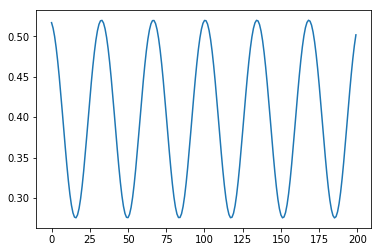

In [21]:
plt.plot(states[:,1])
plt.show()

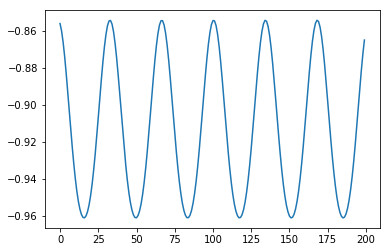

In [22]:
plt.plot(states[:,0])
plt.show()

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
#Picking only the first 100 points to have a similar graphic to the one on ex4.pdf
plt.plot(rewards[:100], linewidth=2.5)
plt.title("Reward during simulation State Value Action Critic")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

NameError: name 'rewards' is not defined

<Figure size 1080x288 with 0 Axes>

### Exercise 2.4 

Measure the performance in three ways:

* rise time: how many episodes does it take for the learning to converge? Use the point at which the episode reward is consistently above -500.
* end performance: the reward obtained after training. Use a separate run of 100 episodes where exploration and learning is disabled, and average the episode rewards.
* computation time: how long it took to train 100 episodes. Use time.time().

Run the training a few times and average the results to get statistically meaninful information.

#### Answer

Implementation in the cells bellow

In [50]:
# Creating function to act on the system with no learning and exploration.

def end_perf_state_value_action_critic(env, 
                                       theta,
                                       episodes=200, 
                                       steps=1000, 
                                       render_step=0):
    s = env.reset()
    # Create feature as a rbfprojector
    feature = rbfprojector(21, 0.25)
    rewards = []
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        for t in range(steps):
            # Compute phi_s and pi_s_theta
            phi_s = feature(s)
            pi_s_theta = np.dot(theta, phi_s)
            # Take an action and apply to the system
            a = pi_s_theta
            sP, r, done, _ = env.step(a)
            total_r+=r
            if render_step and not t%render_step:
                env.render()
            if done:
                break
            s = sP
        rewards.append(total_r) 
    return np.array(rewards) 

In [62]:
rewards = end_perf_state_value_action_critic(Pendulum(), theta)

100%|██████████| 200/200 [00:10<00:00, 19.98it/s]


In [131]:
# Running 5 different tests on the algorithm to evaluate the metrics

num_tests = 5
environment = Pendulum()
perfs, trains, training_time = [], [], []
for i in range(num_tests):
    theta, w, train_reward, time_consumption = state_value_action_critic(environment, plot=False)
    perf_reward = end_perf_state_value_action_critic(environment, theta )
    trains.append(train_reward)
    perfs.append(perf_reward)
    training_time.append(time_consumption)

100%|██████████| 100/100 [00:04<00:00, 22.10it/s]


In [133]:
number_episodes = np.array(list(map(lambda x: np.argwhere(x>-500)[3,0], trains)))
number_episodes.mean(), np.median(number_episodes), number_episodes.std()

(16.666666666666668, 12.0, 8.055363982396383)

In [134]:
end_performances = np.array(list(map(lambda x: x.mean(), perf_reward)))
end_performances.mean(), np.median(end_performances), end_performances.std()

(-210.6968780089007, -226.98652554165182, 146.8189717158916)

In [135]:
training_time = np.array(training_time)
training_time.mean(), np.median(training_time), training_time.std()

(8.37503080368042, 8.336115837097168, 0.3397824343631149)

#### Results

  | Metric | Mean Value | Median Value | Standard Deviation |
   |---|---|---|---|
   | Rise Time |  16.666| 12| 8.055|
   | End Performance| -210.6968 | -266.986 | 146.818 | 
   | Computation Time (s)| 8.3750 | 8.336 | 0.3397|

## 3. Deep Deterministic Policy Gradient

Now we move to a nonlinear representation, with the required stabilization mechanisms (replay memory, target network). The Deep Deterministic Policy Gradient algorithm estimates the value function (critic) in the same way as Deep Q learning you implemented in Exercise 3, but additionally trains a policy (actor) using the gradient

$∇\theta J_r(\theta)= E_{\pi \theta} \{\nabla_\theta Q^{\pi\theta} (s,\pi(s;\theta))\}$

that is, moving the policy parameters such that they maximize the $Q$ function.

### Exercise 3.1.

Implement DDPG. Use `DDPG.critic` to read the value function and `DDPG.actor` to read the policy. Note that the DDPG.train function already handles the training of the actor using the gradient in Equation 1. Update the target network every $200$ steps. 

Note that the actor network’s output is limited to $[−1, 1]$, while the pen- dulum’s actions are in the range [−2,2]. To make sure the results are comparable, multiply the actor’s value by $2$ before passing it to `env.step`, and halve the noise.

After training, plot the learning curve and approximators. For the latter, use `env.plotnetwork(ddpg)`. The results should be similar to Figure 3.

#### Answer:

Implementation in the cells below.

In [52]:
def ddpg_loop(env, 
              sigma=1, 
              gamma=0.99,
              episodes=200, 
              steps=1000, 
              render_step=0,
              memory_len_min=1000,
              batch_size=256,
              train_step_amount=200,
              rate=0.99,
              plot=True):
    # Reset enviroment to get a state
    s = env.reset()
    # Use the state to instatiate DDPG for base and target networks, and also for memory
    ddpg = DDPG(s.shape[0])
    target_net = DDPG(s.shape[0])
    memory = Memory(s.shape[0], 1)
    rewards = []
    train_steps = 0
    start = time()
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        for t in range(steps):
            # Add to train_step incremetor for target_network to get weights from ddpg
            train_steps+=1
            # Take action using ddpg.actor as mean and use half sigma for noise 
            a = np.random.normal(ddpg.actor(s), 0.5*sigma)
            # Multiply action by 2 since output of the network is limited
            sP, r, done, _, info = env.step(2*a)
            # Add info to memory
            memory.add(s, a, r, sP.reshape((sP.shape[0])), done)
            total_r+=r
            # If at least 1000 transitions in memory, sample the memory
            if memory.__len__() > memory_len_min:
                s_mem, a_mem, r_mem, sP_mem, done_mem = memory.sample(batch_size)
                # Compute target using target network
                y = r_mem + gamma*target_net.critic(sP_mem, a_mem) * abs(done_mem - 1)
                ddpg.train(s_mem, a_mem, y)
                # After a certain number of timesteps, copy weights to target network
                if (train_steps >= train_step_amount):
                    target_net <<= ddpg
                    train_steps = 0
            if done:
                break
            s = sP
        rewards.append(total_r) 
        sigma = sigma*rate
    end = time()
    env.close()
    return ddpg, rewards, end-start

In [53]:
rewards, ddpg, _ = ddpg_loop(Tweezer())

  0%|          | 0/200 [00:00<?, ?it/s]


ValueError: in user code:

    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/oscar.kremer/miniconda3/envs/deep-tweezer/lib/python3.6/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_48 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (2, 1)


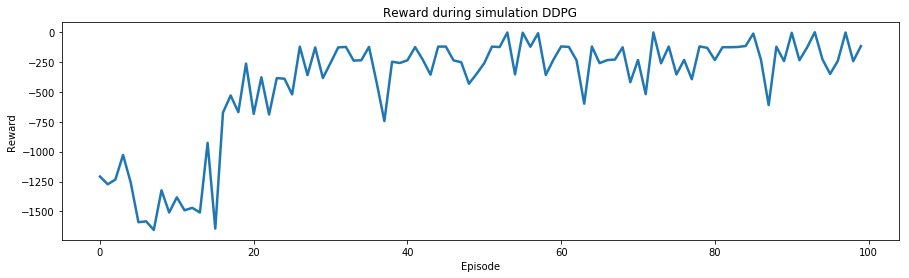

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
#Picking only the first 100 points to have a similar graphic to the one on ex4.pdf
plt.plot(rewards[:100], linewidth=2.5)
plt.title("Reward during simulation DDPG")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Exercise 3.2.

Measure the same statistics as for linear state-value actor-critic, and compare the results. Is it what you expected? Explain.

In [99]:
# Creating function to act on the system with no learning and exploration.

def end_perf_ddpg(env, 
                  ddpg,
                  episodes=200, 
                  steps=1000, 
                  render_step=0):
    s = env.reset()
    rewards = []
    for e in tqdm(range(episodes)):
        s = env.reset()
        total_r = 0
        for t in range(steps):
            # Take an action and apply to the system
            a = ddpg.actor(s)
            sP, r, done, _ = env.step(a)
            total_r+=r
            if render_step and not t%render_step:
                env.render()
            if done:
                break
            s = sP
        rewards.append(total_r) 
    return np.array(rewards) 

In [101]:
# Testing function
reward = end_perf_ddpg(environment, ddpg)

100%|██████████| 200/200 [01:38<00:00,  2.03it/s]


In [106]:
# Running 5 different tests on the algorithm to evaluate the metrics with 100 episodes to consume less time

num_tests = 5
environment = Pendulum()
perfs, trains, training_time = [], [], []
for i in range(num_tests):
    ddpg, train_reward, time_consumption = ddpg_loop(environment, episodes=100, plot=False)
    perf_reward = end_perf_ddpg(environment, ddpg, episodes=100)
    trains.append(train_reward)
    perfs.append(perf_reward)
    training_time.append(time_consumption)

100%|██████████| 100/100 [03:55<00:00,  2.36s/it]


In [126]:
number_episodes = np.array(list(map(lambda x: np.argwhere(np.array(x)>-500)[3][0], trains)))
number_episodes.mean(), np.median(number_episodes), number_episodes.std()

(36.333333333333336, 30.0, 12.657891697365017)

In [127]:
end_performances = np.array(list(map(lambda x: x.mean(), perf_reward)))
end_performances.mean(), np.median(end_performances), end_performances.std()

(-1014.7041650936073, -977.6824290654102, 354.4362118926296)

In [128]:
training_time = np.array(training_time)
training_time.mean(), np.median(training_time), training_time.std()

(530.2096154212952, 479.3325080871582, 117.30870358139215)

#### Results

The results in table also include the ones encountered in the exercise 2.4.

  | Model | Metric | Mean Value | Median Value | Standard Deviation |
   |---|---|---|---|---|
   |SVAC| Rise Time |  16.666| 12| 8.055|
   |SVAC| End Performance| -210.6968 | -266.986 | 146.818 | 
   |SVAC| Computation Time (s)| 8.3750 | 8.336 | 0.3397|
   |DDPG| Rise Time |  36.34| 30.00| 12.657|
   |DDPG| End Performance| -1014.734 | -977.6824 | 354.436 | 
   |DDPG| Computation Time (s)| 530.209 | 479.3324 | 117.308|
   
As expected, the computation time of DDPG is much higher than SVAC, since the neural networks are much more complex and have a bigger of parameters to adjust in its training. It would be expected that the DDPG would be better since its a more complex model, however for the number of trials in all the parameters SVAC achieved better results. With this is possible to conclude that for inverse pendulum problem, the RBF estimator with SVAC is a better option than using DDPG.
   